# TEST Fast5Tools package

## Imports

In [1]:
# pycl imports
from pycl.pycl import head, tail, cat, linerange, fastcount, dir_walk, mkdir, hide_traceback, larger_display, jprint
from pycl.pycl import jhelp as help
import numpy as np
import pandas as pd
import shelve
from itertools import islice
from pprint import pprint as pp
import pysam
import sys
from tqdm import tqdm
from collections import OrderedDict, defaultdict, Counter, namedtuple
import h5py

# Matplotlib imports
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 40, 5
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 1000

# Jupyter tweaking
#hide_traceback()
larger_display(100)

# from Fast5Tools.Fast5 import Fast5, Fast5Error
# from Fast5Tools.Fast5_db import Fast5_db
# from Fast5Tools.make_fast5_db import make_fast5_db
# from Fast5Tools.Helper_fun import stderr_print, recursive_file_gen, visit_h5, parse_attrs
# from Fast5Tools.Basecall import Basecall
# from Fast5Tools.Alignment import Alignment
# from Fast5Tools.Eventalign import Eventalign

ModuleNotFoundError: No module named 'Fast5Tools.Fast5_db'

# Test Fast5

## Fast5 init

In [ ]:
help (Fast5.__init__, full=True)

In [8]:
f = Fast5.from_fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
print (f)

[Fast5]	Read ID: b'61e799eb-5571-4cc4-bbf6-b3929b197459'
	[raw] Signal: [-0.68773109 -1.05224675 -0.95504257 -0.97934362 -1.01174501]... / Length: 87570 / Normalization: zscore



In [4]:
f = Fast5.from_fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", signal_normalization=None)
print (f)

[Fast5]	Read ID: b'61e799eb-5571-4cc4-bbf6-b3929b197459'
	[raw] Signal: [623 578 590 587 583]... / Length: 87570



In [5]:
f = Fast5.from_fast5 (fast5_fn="./data/fast5/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", basecall_required=True)
print (f)

[Fast5]	Read ID: 61e799eb-5571-4cc4-bbf6-b3929b197459
	[raw] Signal: [-0.68773109 -1.05224675 -0.95504257 -0.97934362 -1.01174501]... / Length: 87570 / Normalization: zscore
	[basecall] Seq: UUAUCGAUUU...UCCCUUCAGG / Length: 840 / Empty kmers: 137 / Mean quality: 10.89



In [6]:
f = Fast5.from_fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", basecall_required=True)
print (f)

Fast5Error: No Basecall Value

## Test Properties

In [3]:
f = Fast5.from_fast5 (fast5_fn="./data/fast5/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
print(f.read_id)
print(f.sequencing_kit)
print(f.flowcell_type)

61e799eb-5571-4cc4-bbf6-b3929b197459
SQK-RNA001
FLO-MIN106


## Test Metadata

In [4]:
f = Fast5.from_fast5 (fast5_fn="./data/fast5/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
pp(f.metadata)

OrderedDict([('context_tags',
              OrderedDict([('experiment_duration_set', '2880'),
                           ('experiment_type', 'rna'),
                           ('fast5_output_fastq_in_hdf', '1'),
                           ('fast5_raw', '1'),
                           ('fast5_reads_per_folder', '2000'),
                           ('fastq_enabled', '0'),
                           ('fastq_reads_per_file', '4000'),
                           ('filename',
                            'antons_mac_pro_internal_sanger_ac_uk_20180625_fah77625_mn23126_sequencing_run_s1_57529'),
                           ('flowcell_type', 'flo-min106'),
                           ('kit_classification', 'none'),
                           ('local_basecalling', '0'),
                           ('local_bc_comp_model', ''),
                           ('local_bc_temp_model',
                            'template_r9.4_70bps_5mer_rna_raw.jsn'),
                           ('sample_frequency', '3012'),


In [6]:
f = Fast5.from_fast5 (fast5_fn="./data/fast5/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
for i, j in f.data.items():
    print (i)
    pp (j.metadata)

raw
OrderedDict([('read_number', 10),
             ('read_id', '61e799eb-5571-4cc4-bbf6-b3929b197459'),
             ('start_mux', 1),
             ('start_time', 79983),
             ('duration', 87570),
             ('median_before', 254.354736328125),
             ('normalization', 'zscore')])
basecall
OrderedDict([('segmentation', 'Analyses/Segmentation_000'),
             ('time_stamp', '2018-Jul-03 18:44:47'),
             ('name', 'ONT Albacore Sequencing Software'),
             ('version', '2.3.1'),
             ('component', 'basecall_1d'),
             ('mean_qual', 10.887440758293838),
             ('empty_kmers', 137)])


## Test Data access

In [8]:
f = Fast5.from_fast5 (fast5_fn="./data/fast5/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
display(f.data["basecall"].kmers[:10])
display(f.data["raw"].signal[:10])

array([(b'GGACT',    0,   15, -1.04522644, -1.06034709, 0.11497042),
       (b'GACTT',   15,   60,         nan,         nan,        nan),
       (b'ACTTC',   15,   60, -1.11434941, -1.07654779, 0.14640506),
       (b'CTTCC',   60,  105, -1.34637938, -1.28715683, 0.16223021),
       (b'TTCCC',  105,  120, -1.69271425, -1.66787318, 0.08766691),
       (b'TCCCT',  120,  240, -1.49844091, -1.69217422, 0.66387411),
       (b'CCCTA',  240, 3720,         nan,         nan,        nan),
       (b'CCTAA',  240, 3720,  0.95412096,  0.98904091, 0.2853537 ),
       (b'CTAAT', 3720, 4080,         nan,         nan,        nan),
       (b'TAATA', 3720, 4080, -0.31572262, -0.35561683, 0.31462231)],
      dtype=[('seq', 'S5'), ('start', '<u4'), ('end', '<u4'), ('mean', '<f8'), ('median', '<f8'), ('std', '<f8')])

array([-0.68773109, -1.05224675, -0.95504257, -0.97934362, -1.01174501,
       -1.10084883, -1.10084883, -1.06034709, -1.07654779, -1.07654779])

## Test plot

In [3]:
help (Fast5.plot, full=True)

Plot signal and kmers boundaries

* start INT

If defined the signal plot will start at that value

* end INT

If defined the signal plot will end at that value

* plot_analyses BOOL

If True the start and end position of each kmer will be indicated by vertical lines on the graph

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

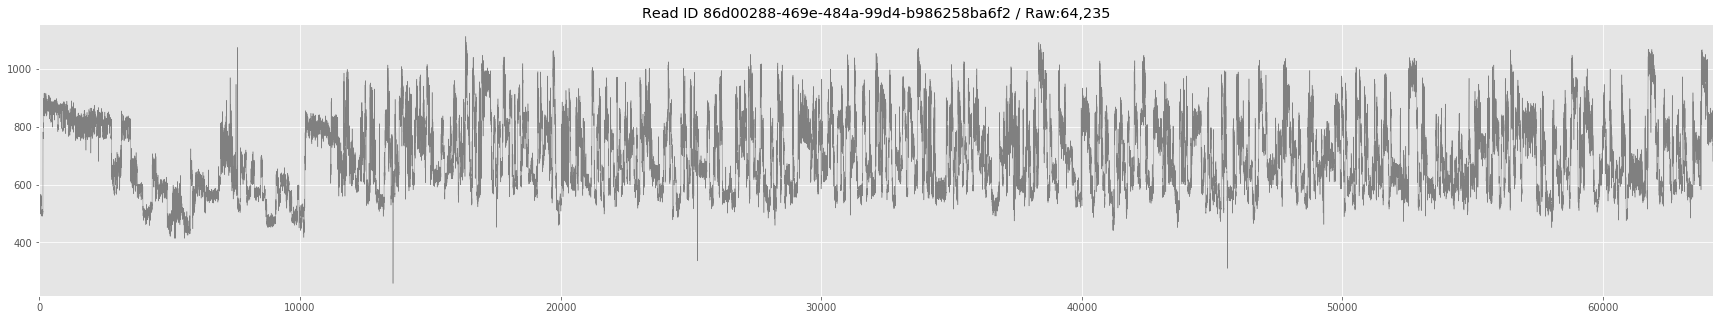

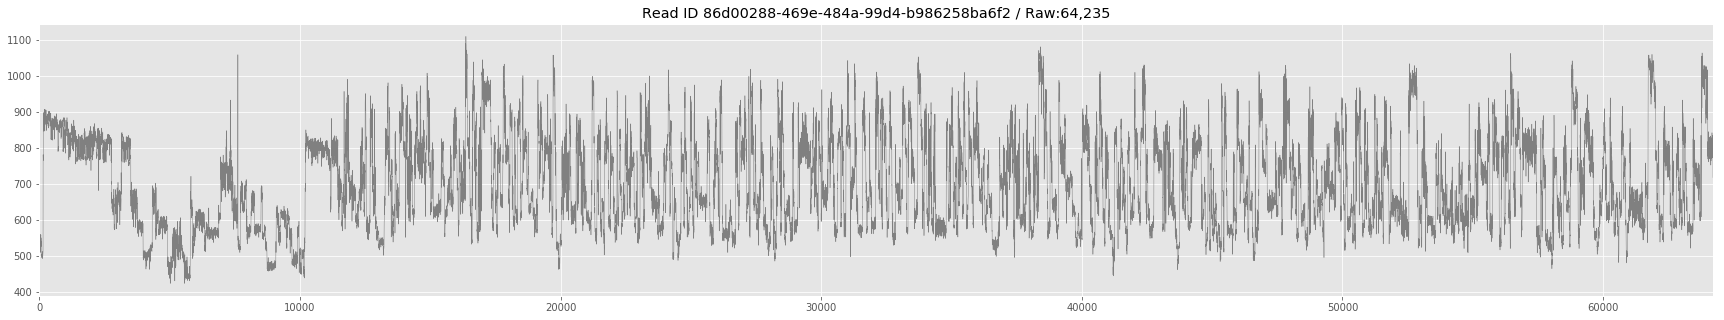

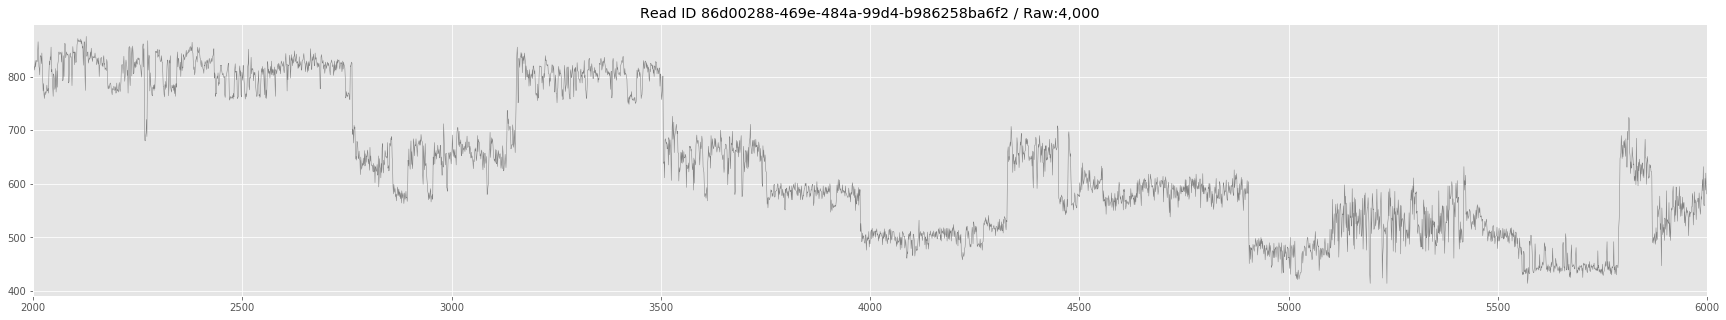

In [4]:
f = Fast5.from_fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_120_strand.fast5", signal_normalization=None)
fig, ax = f.plot ()
fig, ax = f.plot (smoothing_win_size=3)
fig, ax = f.plot (start = 2000, end = 6000)

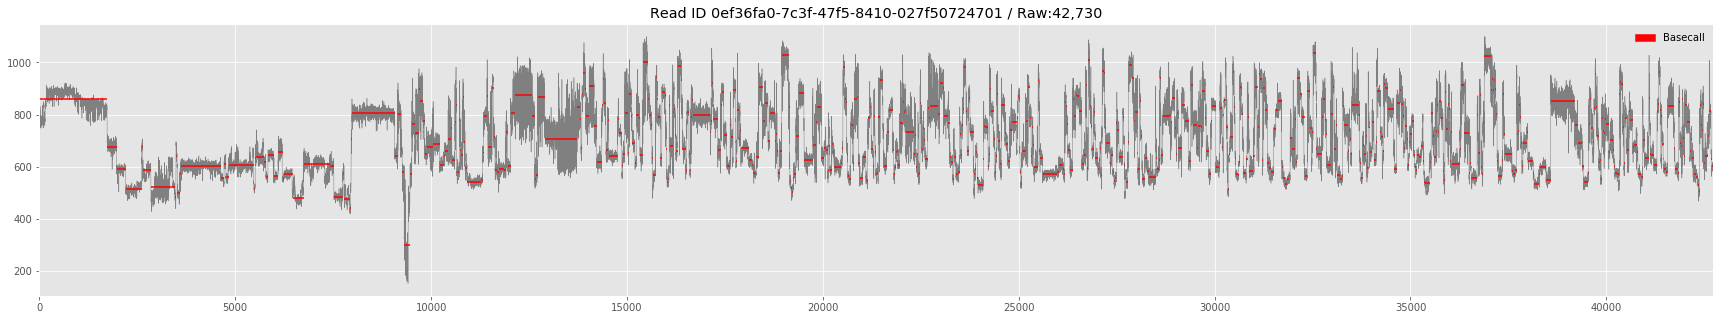

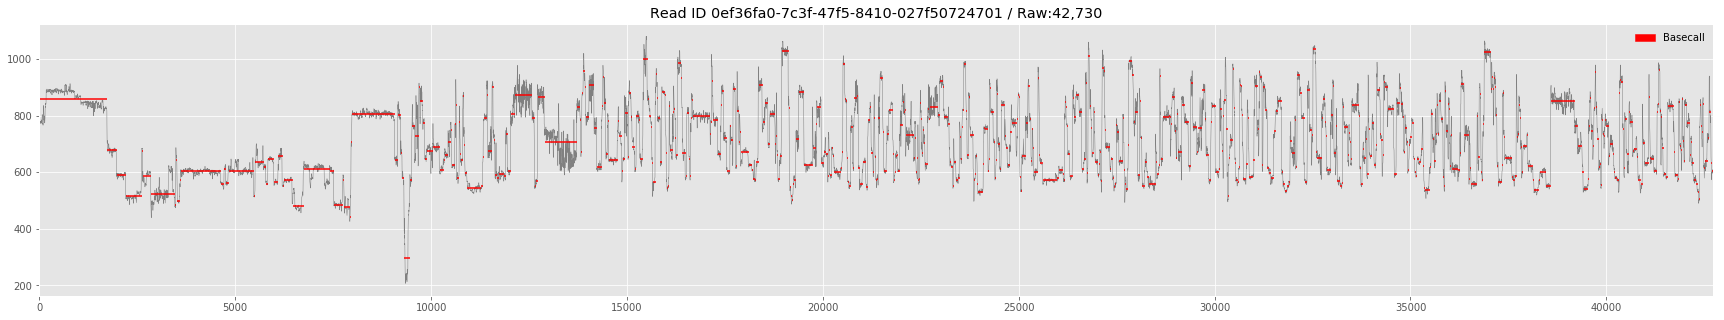

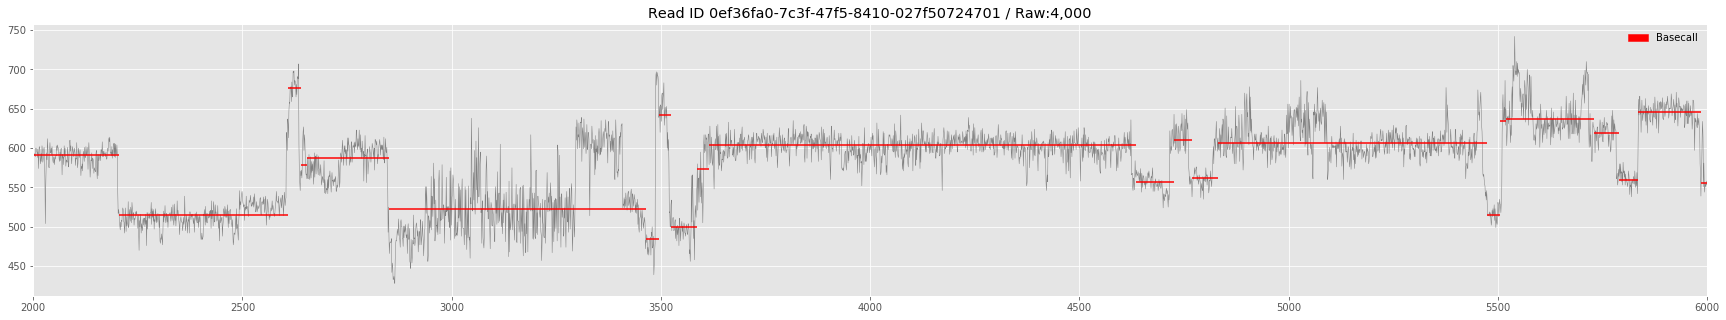

In [5]:
f = Fast5.from_fast5 (fast5_fn="./data/fast5/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_108_strand.fast5", signal_normalization=None)
fig, ax = f.plot ()
fig, ax = f.plot (smoothing_win_size=10)
fig, ax = f.plot (start = 2000, end = 6000)

# make_fast5_db

In [4]:
make_fast5_db (fast5_dir="./data/fast5/", db_fn="./output/read.db", threads=4, verbose=True)

Initialise
Parse Fast5 files and save to database
	Valid files:22 Invalid File:0


In [6]:
make_fast5_db (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/", db_fn="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=6, verbose=True)

Initialise
Parse Fast5 files and save to database
	Valid files:12,492 Invalid File:0


# Fast5_db

### init with context manager

In [7]:
with Fast5_db (db_fn="./output/read.db", verbose=True) as f:
    display(f.read_id_list)

Load reads ids
Open hdf5 database


array(['e6a8e4d0-7b3c-471a-be26-fa7857d12663',
       '5b7fadd0-c646-4c7b-9800-66ee658a5ca8',
       'f8325de9-a77e-4616-a4a8-69ecf32e1688',
       '2c32553e-62c6-4c7a-bf05-249771364f04',
       '37dfa1d5-5d84-486c-bf47-9eb6438f5645',
       '6af04302-04c8-4d8d-8e87-aa69178b3f24',
       '3e81c32a-f2ee-4719-a88d-e0affe93d26f',
       '08642be5-5cf7-4c4c-8c45-e4d569b9a482',
       '68804104-71dc-465c-b82d-3a99a4689701',
       '3784283c-47cc-48ac-8d7b-7efd32123b56',
       '151757ea-53de-44b1-b86e-f823511af02a',
       '0ef36fa0-7c3f-47f5-8410-027f50724701',
       '4e21bf07-e2df-42d8-b347-59ef2c0618ea',
       '9a1c5296-2ab1-4abd-8d50-e059754cf332',
       'bcb20156-a5fe-4daa-aad9-b62c286e468d',
       '6f4fffe7-ca07-4c5e-9ad1-7470f370a8b0',
       '61e799eb-5571-4cc4-bbf6-b3929b197459',
       'ed05c5e6-7aab-4970-a431-3411047764a6',
       '3f09025f-3d2c-4f84-9ea6-63dba736b649',
       '1f83ee80-ac29-46be-b8bc-9dc9325f1fa7',
       '97205d42-93ac-4c99-af78-e553f7d1ff83',
       'c38cb

Close hdf5 database


In [8]:
with Fast5_db (db_fn="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    display(f.read_id_list)

Load reads ids
Open hdf5 database


array(['d62cc798-c904-43a7-b4ee-97220dd5ecd2',
       '064de274-0ed8-40d4-8a99-0aa80e564d71',
       '3fbc5d09-ec14-4204-bf14-efa00324bfad', ...,
       'e7d0e9df-d4e4-4c9c-98ac-06d971c01f33',
       '81f18563-c503-4f5b-b445-4957a957b293',
       'a7bef6d7-b1d2-403b-851b-9954fe822009'], dtype='<U40')

Close hdf5 database


### get_fast5

In [21]:
with Fast5_db (db_fn="./output/read.db", verbose=True) as f:
    print (f.get_fast5 ("5b7fadd0-c646-4c7b-9800-66ee658a5ca8"))

Load reads ids
Open hdf5 database
Close hdf5 database


[Fast5]	Read ID: 5b7fadd0-c646-4c7b-9800-66ee658a5ca8
	[basecall] Seq: CUGAUGCUUU...AAUCCCUCAG / Length: 464 / Empty kmers: 95 / Mean quality: 9.69
	[raw] Signal: [-1.25072639 -1.33272503 -1.28352584 -1.39012407 -1.42292353]... / Length: 24233 / Normalization: zscore



In [22]:
with Fast5_db (db_fn="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    print (f.get_fast5("d62cc798-c904-43a7-b4ee-97220dd5ecd2"))

Load reads ids
Open hdf5 database
Close hdf5 database


[Fast5]	Read ID: d62cc798-c904-43a7-b4ee-97220dd5ecd2
	[basecall] Seq: CACUUGAUGA...AAUUCCUCUA / Length: 518 / Empty kmers: 97 / Mean quality: 10.89
	[raw] Signal: [ 2.90960067 -0.54647022 -0.70987783 -0.76707049 -0.79975202]... / Length: 37608 / Normalization: zscore



### sample_fast5

In [30]:
with Fast5_db (db_fn="./output/read.db", verbose=True) as f:
    print (f.sample_fast5 (3))

Load reads ids
Open hdf5 database
Close hdf5 database


[[Fast5]	Read ID: 9a1c5296-2ab1-4abd-8d50-e059754cf332
	[basecall] Seq: GUACCAGCCA...CCAAUCCCAG / Length: 1231 / Empty kmers: 194 / Mean quality: 10.28
	[raw] Signal: [-1.0894792  -1.16453245 -1.22290721 -1.45640622 -1.34799596]... / Length: 47720 / Normalization: zscore
, [Fast5]	Read ID: 37dfa1d5-5d84-486c-bf47-9eb6438f5645
	[basecall] Seq: CAUUACUUUU...AAAUCCCAUG / Length: 551 / Empty kmers: 95 / Mean quality: 10.74
	[raw] Signal: [ 0.59179154 -1.05871515 -1.02697464 -1.12219618 -1.00316926]... / Length: 31208 / Normalization: zscore
, [Fast5]	Read ID: bcb20156-a5fe-4daa-aad9-b62c286e468d
	[basecall] Seq: CUGAGCUAUC...AAAUCCCAUU / Length: 302 / Empty kmers: 60 / Mean quality: 9.26
	[raw] Signal: [-1.12499101 -1.19067478 -1.29284953 -1.31474412 -1.30744592]... / Length: 29589 / Normalization: zscore
]


In [46]:
with Fast5_db (db_fn="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    print (f.sample_fast5 (10))

Load reads ids
Open hdf5 database
Close hdf5 database


[[Fast5]	Read ID: b5d60032-7191-4fda-b826-4c29ffde1879
	[basecall] Seq: GAAAAUGCUC...UAAAAUCCAG / Length: 814 / Empty kmers: 138 / Mean quality: 10.0
	[raw] Signal: [-1.47143732 -1.56810224 -1.34840923 -1.36598467 -1.38356011]... / Length: 59427 / Normalization: zscore
, [Fast5]	Read ID: b8e58089-616a-45de-a7eb-3939c4b8e89b
	[basecall] Seq: CUAAUGAAUU...UAAAUCCCAG / Length: 1053 / Empty kmers: 162 / Mean quality: 11.43
	[raw] Signal: [-1.18510188 -1.46230507 -1.53568238 -1.50307024 -1.60090666]... / Length: 34146 / Normalization: zscore
, [Fast5]	Read ID: 99a75d87-abf2-4a46-ab95-03d57173ef31
	[basecall] Seq: ACAUUCAUCA...CCUUCCCAGG / Length: 856 / Empty kmers: 147 / Mean quality: 10.44
	[raw] Signal: [ 0.2039621  -1.43076774 -1.23161284 -1.58013392 -1.31459405]... / Length: 40505 / Normalization: zscore
, [Fast5]	Read ID: 467f74ec-1e1f-45fe-a220-1fe1e251937d
	[basecall] Seq: GUACAUAUUC...UUUAAUGAUC / Length: 1077 / Empty kmers: 172 / Mean quality: 11.42
	[raw] Signal: [-1.42352289 -1.5

### iter_fast5

In [47]:
l = []
with Fast5_db (db_fn="./output/read.db", verbose=True) as f:
    for fast5 in f.iter_fast5():
        l.append(fast5)

Load reads ids
Open hdf5 database
Close hdf5 database


In [48]:
l = []
with Fast5_db (db_fn="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    for fast5 in f.iter_fast5():
        l.append(fast5)

Load reads ids
Open hdf5 database
Close hdf5 database


# Alignment parsing

In [4]:
make_fast5_db (fast5_dir="./data", db_fn="./output/read.db", threads=4, verbose=True, basecall_required=True)

with Fast5_db (db_fn="./output/read.db", verbose=True) as f:
    f.bam_to_db(fn="./data/aligned_reads.bam", analysis_name="transcriptome", verbose=True, only_primary=True)

Initialise
Parse Fast5 files and save to database
	Valid files:22 Invalid File:40
	Invalid fast5 files summary
		No Basecall Value:40
Load reads ids
Open hdf5 database
Parse alignment file ./data/aligned_reads.bam
	Parse bam header
	Valid hits:20	Primary:20	Secondary:1	Not in database:0	Unmapped:2
Close hdf5 database


In [5]:
make_fast5_db (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/", db_fn="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=6, verbose=True)

with Fast5_db (db_fn="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    f.bam_to_db (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam", alignment_num=0, verbose=True)
    f.bam_to_db (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/genome_aligned_reads.bam", alignment_num=1, verbose=True)

Initialise
Parse Fast5 files and save to database
Process Process-18:Invalid File:0
Process Process-20:


KeyboardInterrupt: 

Traceback (most recent call last):
Process Process-22:
Traceback (most recent call last):
Process Process-21:
Process Process-24:
Process Process-19:
  File "/home/aleg/.local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Process Process-23:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/aleg/.local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/aleg/.local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/aleg/.local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/aleg/.virtualenvs/Python3.6/lib/python3.6/site-packages/numpy/core/numerictypes.py", line 665, in issubclass_
    return issubclass(arg1, arg2)
  File "/home/aleg/Programming/Fast5Tools/

  File "/home/aleg/Programming/Fast5Tools/Fast5Tools/Fast5.py", line 154, in _to_db
    self.basecall._to_db (basecall_grp)

During handling of the above exception, another exception occurred:

  File "/home/aleg/.local/lib/python3.6/multiprocessing/managers.py", line 757, in _callmethod
    kind, result = conn.recv()
KeyboardInterrupt
  File "/home/aleg/Programming/Fast5Tools/Fast5Tools/Basecall.py", line 47, in _to_db
    grp.create_dataset("kmers", data=self.kmers, compression="lzf")
  File "/home/aleg/.virtualenvs/Python3.6/lib/python3.6/site-packages/numpy/lib/function_base.py", line 4119, in median
    overwrite_input=overwrite_input)
  File "/home/aleg/.virtualenvs/Python3.6/lib/python3.6/site-packages/h5py/_hl/group.py", line 117, in create_dataset
    dset = dataset.Dataset(dsid)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
Traceback (most recent call last):
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
KeyboardInterrupt
  F

# NanopolishParser

In [9]:
make_fast5_db (fast5_dir="./data", db_fn="./output/read.db", threads=4, verbose=True, basecall_required=True)

with Fast5_db (db_fn="./output/read.db", verbose=True) as f:
    f.bam_to_db(fn="./data/aligned_reads.bam", analysis_name="transcriptome", verbose=True)
    f.eventalign_to_db (fn="./data/nanopolish_reads_index_collapsed.tsv", analysis_name="transcriptome", verbose=True)

Initialise
Parse Fast5 files and save to database
	Valid files:22 Invalid File:40
	Invalid fast5 files summary
		No Basecall Value:40
Load reads ids
Open hdf5 database
Parse alignment file ./data/aligned_reads.bam
	Valid hits:21	Primary:20	Secondary:1	Not in database:0	Unmapped:2
Parse eventalign file ./data/nanopolish_reads_index_collapsed.tsv
	Valid hits:21	Not in database:0
Close hdf5 database


### Test on larger dataset

In [4]:
make_fast5_db (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/", db_fn="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=4, verbose=True, basecall_required=True)

with Fast5_db (db_fn="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    f.bam_to_db (fn="/home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam", analysis_name="transcriptome", verbose=True)
    f.eventalign_to_db (fn="/home/aleg/Analyses/Nanopore_yeast/nanopolish/nanopolish_read_index_collapsed.tsv", analysis_name="transcriptome", verbose=True)

Initialise
Parse Fast5 files and save to database
	Valid files:12,492 Invalid File:0
Load reads ids
Open hdf5 database
Parse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam
	Valid hits:13,920	Primary:11,698	Secondary:2,222	Not in database:0	Unmapped:794
Parse eventalign file /home/aleg/Analyses/Nanopore_yeast/nanopolish/nanopolish_read_index_collapsed.tsv
	Valid hits:13,699	Not in database:0
Close hdf5 database


# List and remove analyses

In [8]:
make_fast5_db (fast5_dir="./data", db_fn="./output/read.db", threads=4, verbose=True, basecall_required=True)

with Fast5_db (db_fn="./output/read.db", verbose=True) as f:
    f.bam_to_db(fn="./data/aligned_reads.bam", analysis_name="transcriptome", verbose=True)
    f.list_analyses()
    f.remove_analysis ("alignment", "transcriptome")
    f.bam_to_db (fn="./data/aligned_reads.bam", analysis_name="transcriptome", verbose=True)

Initialise
Parse Fast5 files and save to database
	Valid files:22 Invalid File:40
	Invalid fast5 files summary
		No Basecall Value:40
Load reads ids
Open hdf5 database
Parse alignment file ./data/aligned_reads.bam
	Valid hits:21	Primary:20	Secondary:1	Not in database:0	Unmapped:2
Analysis type: alignment
	Analysis name: transcriptome	Number of elements: 18
Removed analysis from 20 fast5 reads
Parse alignment file ./data/aligned_reads.bam
	Valid hits:21	Primary:20	Secondary:1	Not in database:0	Unmapped:2
Close hdf5 database


In [4]:
visit_h5 ("./data/fast5/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_113_strand.fast5")

UniqueGlobalKey <HDF5 group "/UniqueGlobalKey" (3 members)>
UniqueGlobalKey/tracking_id <HDF5 group "/UniqueGlobalKey/tracking_id" (0 members)>
UniqueGlobalKey/context_tags <HDF5 group "/UniqueGlobalKey/context_tags" (0 members)>
UniqueGlobalKey/channel_id <HDF5 group "/UniqueGlobalKey/channel_id" (0 members)>
PreviousReadInfo <HDF5 group "/PreviousReadInfo" (0 members)>
Raw <HDF5 group "/Raw" (1 members)>
Raw/Reads <HDF5 group "/Raw/Reads" (1 members)>
Raw/Reads/Read_10 <HDF5 group "/Raw/Reads/Read_10" (1 members)>
Raw/Reads/Read_10/Signal <HDF5 dataset "Signal": shape (35752,), type "<i2">
Analyses <HDF5 group "/Analyses" (3 members)>
Analyses/Basecall_1D_000 <HDF5 group "/Analyses/Basecall_1D_000" (3 members)>
Analyses/Basecall_1D_000/BaseCalled_template <HDF5 group "/Analyses/Basecall_1D_000/BaseCalled_template" (2 members)>
Analyses/Basecall_1D_000/BaseCalled_template/Events <HDF5 dataset "Events": shape (2383,), type "|V41">
Analyses/Basecall_1D_000/BaseCalled_template/Fastq <HDF

# Normalization

## Normalize raw to basecall values 

In [4]:
def basecall_scale_param (events, raw):
    
    # Get list of events mean values
    event_list = events["mean"]
    
    # Get list of raw mean values
    raw_list = []
    for line in events:
        r = raw [line["start"]:line["start"]+line["length"]]
        raw_list.append(r.mean())
    raw_list = np.array (raw_list)
    
    # Compute median
    event_med = np.median (event_list)
    raw_med = np.median (raw_list)
    
    # Compute mad
    event_mad = np.median (np.abs (event_list - event_med))
    raw_mad = np.median (np.abs (raw_list - raw_med))
    
    # Compute scale and shift
    scale = event_mad / raw_mad
    shift = event_med - raw_med*scale 
    
    return (scale, shift)

## Normalize to overall kmer model

In [8]:
def overall_kmer_model_scale_param (kmers_dict, raw):
    
    kmers_list = np.array(list(kmers_dict.values()))
    raw_list = raw
    
    # Compute median
    kmers_med = np.median (kmers_list)
    raw_med = np.median (raw_list)
    
    # Compute mad
    kmers_mad = np.median (np.abs (kmers_list - kmers_med))
    raw_mad = np.median (np.abs (raw_list - raw_med))
    
    # Compute scale and shift
    scale = kmers_mad / raw_mad
    shift = kmers_med - raw_med*scale 
    
    return (scale, shift)

## Normalize to sequence aligned kmer model

In [9]:
def event_kmer_model_scale_param (events, raw, kmers_dict):
        
    # Get list of raw mean values
    raw_list = []
    kmer_list = []
    
    for line in events:
        start = int(line["start"])
        seq = line["model_state"].decode()
        
        r = raw [start:start+15]
        raw_list.append(r.mean())
        kmer_list.append (kmers_dict [seq])
        
    raw_list = np.array (raw_list)
    kmer_list = np.array (kmer_list)
    
    # Compute median
    kmer_med = np.median (kmer_list)
    raw_med = np.median (raw_list)
    
    # Compute mad
    kmer_mad = np.median (np.abs (kmer_list - kmer_med))
    raw_mad = np.median (np.abs (raw_list - raw_med))
    
    # Compute scale and shift
    scale = kmer_mad / raw_mad
    shift = kmer_med - raw_med*scale 
    
    return (scale, shift)

## Normalize to sequence aligned kmer model with MOM

In [79]:
# // Calculate summary statistics over the events and the model implied by the read
# double event_level_sum = 0.0f;
# for(size_t i = 0; i < et.n; ++i) {
#     event_level_sum += et.event[i].mean;
# }

# // estimate scale
# double kmer_level_sum = 0.0f;
# double kmer_level_sq_sum = 0.0f;
# for(size_t i = 0; i < n_kmers; ++i) {
#     size_t kmer_rank = alphabet->kmer_rank(sequence.substr(i, k).c_str(), k);
#     double l = pore_model.get_parameters(kmer_rank).level_mean;
#     kmer_level_sum += l;
#     kmer_level_sq_sum += pow(l, 2.0f);
# }

# double shift = event_level_sum / et.n - kmer_level_sum / n_kmers;

# // estimate scale
# double event_level_sq_sum = 0.0f;
# for(size_t i = 0; i < et.n; ++i) {
#     event_level_sq_sum += pow(et.event[i].mean - shift, 2.0);
# }

# double scale = (event_level_sq_sum / et.n) / (kmer_level_sq_sum / n_kmers);


def event_kmer_model_scale_param (events, raw, kmers_dict):
    
    # Get list of raw mean values
    raw_list = []
    kmer_list = []
    
    for line in events:
        start = int(line["start"])
        seq = line["model_state"].decode()
        
        r = raw [start:start+15]
        raw_list.append(r.mean())
        kmer_list.append (kmers_dict [seq])
        
    raw_list = np.array (raw_list)
    kmer_list = np.array (kmer_list)
    
    # Compute median
    kmer_med = np.median (kmer_list)
    raw_med = np.median (raw_list)
    
    # Compute mad
    kmer_mad = np.median (np.abs (kmer_list - kmer_med))
    raw_mad = np.median (np.abs (raw_list - raw_med))
    
    # Compute scale and shift
    scale = kmer_mad / raw_mad
    shift = kmer_med - raw_med*scale 
    
    return (scale, shift)

## Compare normalization

Basecall scale =  Scale:0.14164101643531687 Shift:0.2832251799948722
Overall kmer scale = Scale:0.124884665 Shift:-0.21356993499999533
Kmer specific scale = Scale:0.07309095289079232 Shift:33.377539955032105
Basecall scale =  Scale:0.14164089758748874 Shift:0.5665898392011997
Overall kmer scale = Scale:0.1372358956043956 Shift:1.6377422967032942
Kmer specific scale = Scale:0.15094888209121257 Shift:-9.353472562291515
Basecall scale =  Scale:0.1416409592617828 Shift:0.5665604796590316
Overall kmer scale = Scale:0.1387607388888889 Shift:3.1305638722222255
Kmer specific scale = Scale:0.14885883842144454 Shift:-5.9034992531645685
Basecall scale =  Scale:0.1416408734579523 Shift:0.1416776236482491
Overall kmer scale = Scale:0.13008819270833336 Shift:4.787020192708326
Kmer specific scale = Scale:0.11527626907073506 Shift:11.773015746185877
Basecall scale =  Scale:0.1416410267023749 Shift:2.9744054467639387
Overall kmer scale = Scale:0.12743333163265308 Shift:9.499398602040813
Kmer specific s

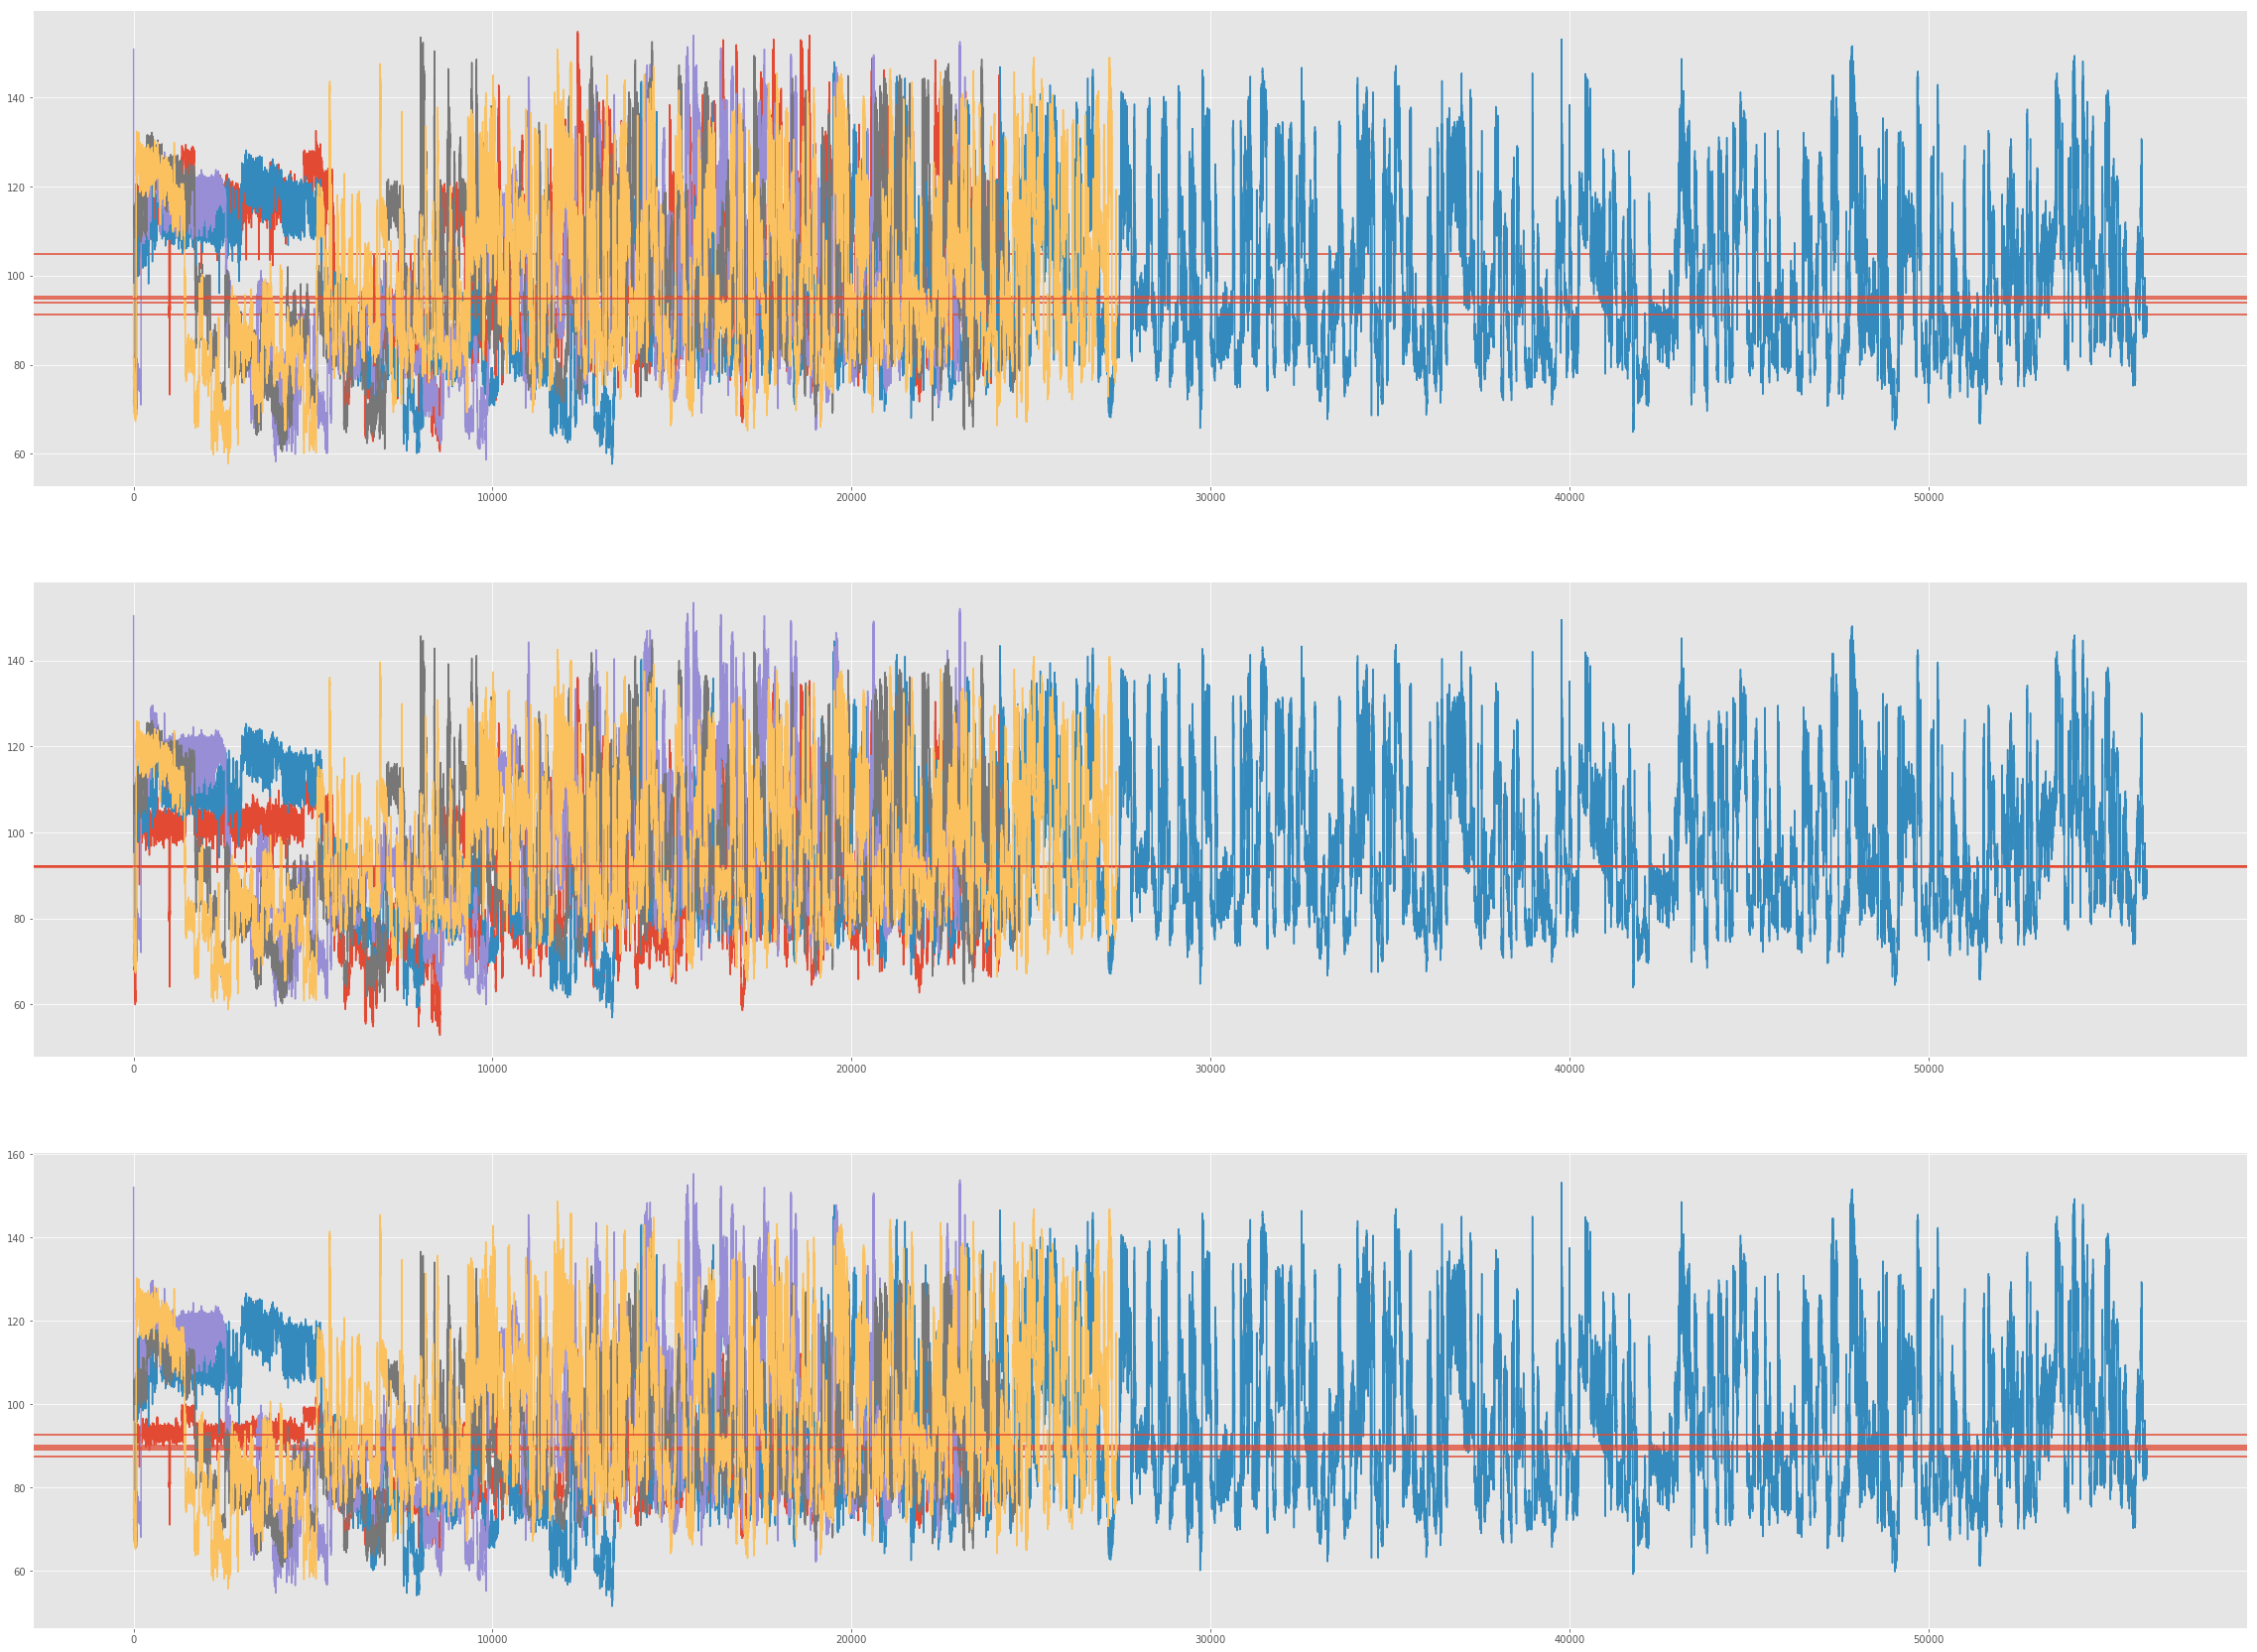

In [11]:
fig, axes = pl.subplots (3, 1, figsize = (40, 30))

kmers_dict = OrderedDict ()
with open("./model/r9.4_180mv_70bps_5mer_RNA.model") as fp:
    _ = fp.readline()
    for line in fp:
        ls = line.split("\t")
        kmers_dict [ls[0]] = float(ls[1])

l = []
val_tuple = namedtuple ("vt", ["scale1", "shift1", "scale2", "shift2", "scale3", "shift3"])
for fast5_fn in islice (recursive_file_gen (dir="./data/fast5/", ext="fast5"), 5):
    
    with h5py.File (fast5_fn) as f:
        events = f["Analyses"]["Basecall_1D_000"]["BaseCalled_template"]["Events"].value
        raw = list(f['/Raw/Reads'].values())[0]['Signal'].value
    
    
    scale1, shift1 = basecall_scale_param (events, raw)
    print ("Basecall scale =  Scale:{} Shift:{}" .format(scale1, shift1))
    scale2, shift2 = overall_kmer_model_scale_param (kmers_dict, raw)
    print ("Overall kmer scale = Scale:{} Shift:{}" .format(scale2, shift2))
    scale3, shift3 = event_kmer_model_scale_param (events, raw, kmers_dict)
    print ("Kmer specific scale = Scale:{} Shift:{}" .format(scale3, shift3))
    
    for scale, shift, ax in ((scale1, shift1, axes[0]), (scale2, shift2, axes[1]), (scale3, shift3, axes[2])):
        start = events["start"][0]
        end = events["start"][-1]
        raw_scaled = (raw*scale+shift) [start:end]
        _ = ax.plot (raw_scaled)
        _ = ax.axhline (np.median(raw_scaled))

# Compare Shelve and hDf5 implementations

In [2]:
from Fast5Tools_hdf5.Fast5_db import Fast5_db
from Fast5Tools_hdf5.make_fast5_db import make_fast5_db
make_fast5_db (fast5_dir="/home/aleg/Analyses/RNA_Yeast_TRM5/albacore/WT/workspace/pass/", db_fn="/home/aleg/Analyses/RNA_Yeast_TRM5/test/read_hdf5.db", threads=4, verbose=True, max_fast5=100)

Initialise
Parse Fast5 files and save to database
	Valid files:100 Invalid File:0


In [3]:
from Fast5Tools.Fast5Parse import Fast5Parse
from Fast5Tools.Fast5Wrapper import Fast5Wrapper
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/RNA_Yeast_TRM5/albacore/WT/workspace/pass/", db_file="/home/aleg/Analyses/RNA_Yeast_TRM5/test/read.db", threads=4, verbose=True, max_fast5=100)

Initialise
Parse Fast5 files and save to database
Write database index                                                                                
	Valid files:100 Invalid File:0
Load database index
	Read in database:100
